i used q-learning to find the optimal action-selection policy for any given finite Markov decision process.

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image    

In [2]:
env=gym.make('FrozenLake-v1' ,render_mode="rgb_array")

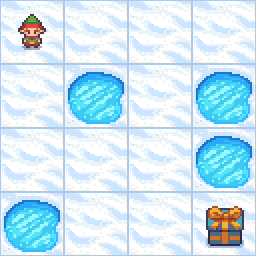

In [3]:
env.reset()
PIL.Image.fromarray(env.render())

In [4]:
state_size=env.observation_space.shape
num_action=env.action_space.n
print(f"state size: {state_size} action:{num_action}" )
#the states size is zero since its starting from [0,0]

state size: () action:4


In [5]:
init_state=env.reset()
init_state

(0, {'prob': 1})

In [ ]:
import frozenlake_utils
#test on random action
action=1
next_state,reward,done,_,_=env.step(action)
frozenlake_utils.display_table(init_state,action,next_state,reward,done)

Initial State:,"(0, {'prob': 1})"
Action:,Move down
Next State:,5
Reward Received:,0.000
Episode Terminated:,True


In [12]:
next_state

5

In [ ]:
is_slippery = True
def load_environment(is_training, is_slippery):
    env = gym.make(
        'FrozenLake-v1',
        desc=None,
        map_name="8x8",
        is_slippery=is_slippery,
        render_mode=None if is_training else 'human')
    return env, env.observation_space.n, env.action_space.n

def epsilon_decay(epsilon, epsilon_min):
    if epsilon > epsilon_min:
        epsilon -= 0.0001
    return epsilon

In [ ]:
def train(
        lr, gamma, epsilon,
        epsilon_min, epsilon_decay,
        n_episodes,
):
    rewards = np.zeros(n_episodes)
    # Load the environment
    env, n_states, n_actions = load_environment(True, is_slippery)
    # Initialize Q table
    Q = np.zeros((n_states, n_actions))
    for episode in range(n_episodes):
        state = env.reset()[0]
        done = False
        while not done:
            # Choose an action based on epsilon-greedy strategy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state, :])
            # Take the action, observe the reward and next state
            next_state, reward, terminated, truncated, info = env.step(action)
            rewards[episode] = reward
            # Update the Q-value using the Q-Learning update rule
            Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            # If the next state is terminal, break the loop
            done = terminated or truncated
            state = next_state
        # Perform epsilon decay
        epsilon = epsilon_decay(epsilon, epsilon_min)
        if epsilon < epsilon_min:
            # Stabilize the Q value in exploitation state
            lr = 0.0001
        # Print log message
        if episode > 0 and episode % 1000 == 0:
            print(
                f"Episode: {episode:5d}/{n_episodes}, Epsilon: {epsilon:.5f}), Accuracy (last 100 episodes): {np.mean(rewards[episode - 100:episode]) * 100}%")
    env.close()
    return Q, rewards

Episode:  1000/15000, Epsilon: 0.89990), Accuracy (last 100 episodes): 0.0%
Episode:  2000/15000, Epsilon: 0.79990), Accuracy (last 100 episodes): 0.0%
Episode:  3000/15000, Epsilon: 0.69990), Accuracy (last 100 episodes): 1.0%
Episode:  4000/15000, Epsilon: 0.59990), Accuracy (last 100 episodes): 0.0%
Episode:  5000/15000, Epsilon: 0.49990), Accuracy (last 100 episodes): 2.0%
Episode:  6000/15000, Epsilon: 0.39990), Accuracy (last 100 episodes): 0.0%
Episode:  7000/15000, Epsilon: 0.29990), Accuracy (last 100 episodes): 2.0%
Episode:  8000/15000, Epsilon: 0.19990), Accuracy (last 100 episodes): 3.0%
Episode:  9000/15000, Epsilon: 0.09990), Accuracy (last 100 episodes): 3.0%
Episode: 10000/15000, Epsilon: -0.00010), Accuracy (last 100 episodes): 22.0%
Episode: 11000/15000, Epsilon: -0.00010), Accuracy (last 100 episodes): 43.0%
Episode: 12000/15000, Epsilon: -0.00010), Accuracy (last 100 episodes): 36.0%
Episode: 13000/15000, Epsilon: -0.00010), Accuracy (last 100 episodes): 34.0%
Epis

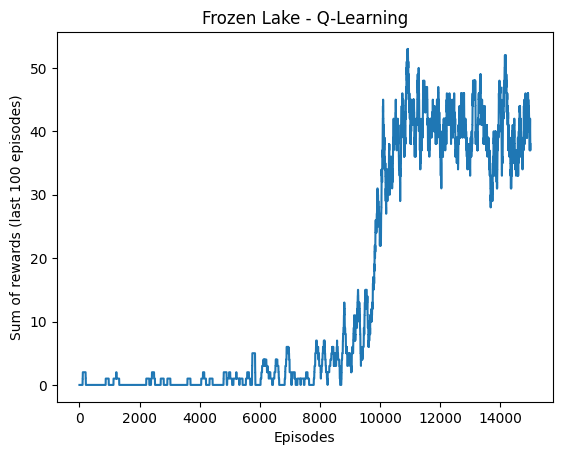

In [17]:
# Hyper Parameters
lr = 0.9    # Learning rate alpha
gamma = 0.9 # Discount factor gamma

epsilon = 1  # Exploration rate epsilon
epsilon_min = 0

n_episodes = 15000

# Train the agent
Q, rewards = train(
    lr, gamma, epsilon,
    epsilon_min, epsilon_decay,
    n_episodes
)

# Save the Q-table
np.save('./output/frozen_lake_q_table.npy', Q)

# Plot the rewards
sum_rewards = np.zeros(n_episodes)
for i in range(n_episodes):
    # Calculate the sum of rewards for every 100 episodes
    sum_rewards[i] = np.sum(rewards[max(0, i - 100):(i + 1)])
plt.title('Frozen Lake - Q-Learning')
plt.plot(sum_rewards)
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards (last 100 episodes)')
plt.savefig('./output/frozen_lake_rewards.png')

In [ ]:
# Evaluate the agent
Q = np.load('output/frozen_lake_q_table.npy')
# Load the environment
env, n_states, n_actions = load_environment(False, is_slippery)
state = env.reset()[0]
done = False
while not done:
    env.render()
    action = np.argmax(Q[state, :]) # Q-values for all actions at state
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    state = next_state
    print(info)

env.close()

{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.3333333333333333}
{'prob': 0.333

In [ ]:
import frozenlake_utils
filename = "./output.gif"
frozenlake_utils.create_video(filename, env, Q)
frozenlake_utils.embed_mp4(filename)